#**STATISTICAL PART**

Created on Monday 04 January 2021  

**Group 5 - Identification of new sources**  

@authors : C.P.M, Y.S., S.B.  

##**1/ Import of library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from wordcloud import WordCloud
from pandas import DataFrame
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

##**2/ File import**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
site = pd.read_csv('/content/drive/My Drive/Liste de sites.csv')

##**3/ Some statistics on the names of sites ...**

1 - Preparation of data

In [4]:
# Step 1 : get the domain (site name) of the site thanks to the url of the article  

def site_name(url):
    site = url.split("://")
    
    if site[0] == "https" or site[0] == "http":
        name_site = site[1]
    else:
        name_site = site[0]
    
    tab = name_site.split("/")
    name_site = tab[0]
    
    
    TLD = ["fr.","www.","www2.",".org",".fr",".eu",".net",".com"]
    
    for i in TLD:
        name_site = name_site.replace(i, "")
    
    return(name_site)

In [5]:
# Step 2 : save the file in a data frame
sites = site
del sites['URL source']
del sites['Nom du site ']
sites['nom_site'] = [site_name(i) for i in sites['URL article']]
sites.columns = ['art_url', 'nom_site']

In [6]:
# Step 3 : put all the names of the sites in a list ...

list_sites = []

for i in range (len(sites)):
  name = site_name(str(sites['art_url'][i]))
  name = name.upper() #puts in uppercase 
  name = name.replace(".", "_")
  name = name.replace(" ","_")
  name = name.replace("-","_")
  list_sites.append(name)

In [7]:
# Step 4 : ... or in a dataframe, as needed

df_sites = DataFrame(list_sites,columns=['nom_site'])

## **4/ Our results concerning the sites :**

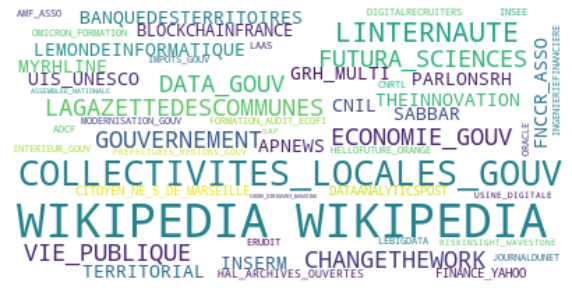

In [8]:
# Step 1 : Word cloud of the sites that appear most often 

df_site = df_sites['nom_site'].str.split(';', expand=False).tolist()
text = ';'.join([item for sublist in df_site if isinstance(sublist,list) for item in sublist])
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="white").generate(text)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Step 2: Count the number of hits per site
# function to count the number of appearances of a site

def countSite(df):
  return df.groupby('nom_site').count()

Text(0.5, 1.0, 'NUMBER OF APPEARANCES PER SITE')

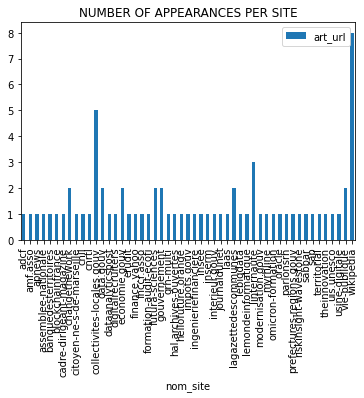

In [10]:
# Applying the function :

dataSite = countSite(sites)
dataSite.plot(kind='bar')
plt.title('NUMBER OF APPEARANCES PER SITE')

In [11]:
# Step 3 : Some basic statistics on the number of appearances

orderedDataSite = dataSite.sort_values('art_url', axis=0, ascending=False)

def stats(dataSite):
  print("On average, each site appears", dataSite.art_url.mean(),"times.")
  print("The median of appearance of the sites is of", dataSite.art_url.median())
  print("The 10 most frequent sites are as follows :")
  print(orderedDataSite.head(10))

# we apply the function :

stats(orderedDataSite)

On average, each site appears 1.392156862745098 times.
The median of appearance of the sites is of 1.0
The 10 most frequent sites are as follows :
                            art_url
nom_site                           
wikipedia                         8
collectivites-locales.gouv        5
linternaute                       3
vie-publique                      2
lagazettedescommunes              2
changethework                     2
gouvernement                      2
futura-sciences                   2
data.gouv                         2
economie.gouv                     2


In [12]:
# Step 4: go back up the list of sites that are really related to our topic (so those that appear most often)

# 1- by putting a parameter on the x% of the most frequent ones :
def most_seen_sites_prop(dataSite,prop=5): # you can change the percentage in parameter 
  dataSite = dataSite.sort_values('art_url', axis=0, ascending = False)
  numb = int((prop/100) * len(dataSite))
  mostSeen = dataSite.head(n=numb)
  moreThanOne = dataSite[dataSite.art_url != 1]
  return mostSeen, moreThanOne

# 2- by setting a parameter on the 20 most frequent ones 

def most_seen_sites_numb(dataSite,numb=10):
  dataSite = dataSite.sort_values('art_url', axis=0, ascending=False)
  mostSeen = dataSite.head(n=numb)
  moreThanOne = dataSite[dataSite.art_url != 1]
  return mostSeen, moreThanOne

In [13]:
# the X% most frequent sites 

mostSeen, moreThanOne = most_seen_sites_prop(dataSite)

In [14]:
# # to get the list of sites and their number of appearances  

moreThanOne.to_csv('list_site_frequency.csv',index=True)

In [15]:
# if we want to read it from the code :

pd.read_csv('list_site_frequency.csv', index_col=0)

,art_url
nom_site,
wikipedia,8
collectivites-locales.gouv,5
linternaute,3
vie-publique,2
lagazettedescommunes,2
changethework,2
gouvernement,2
futura-sciences,2
data.gouv,2


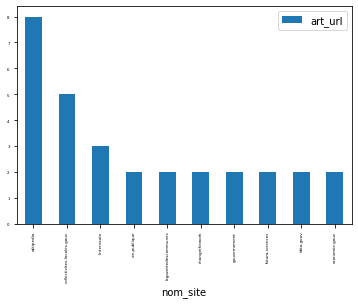

In [16]:
# Bar graph representing the number of times sites appear more than once 

moreThanOne.plot(kind="bar", fontsize=4)

In [17]:
# To have the curve function according to a percentage 

def mostFoundSites(orderedDF,percentage=8):
  listDiff=[] #liste des différences du nombre de site
  articleNumbers=orderedDF['art_url']
  for i in range (len(articleNumbers)-2):
    listDiff.append(articleNumbers[i]/articleNumbers[i+1])
  index=0
  print(listDiff)
  percentage=1+percentage/100
  while (index<len(listDiff)) and (listDiff[index]>percentage):
    print(index)
    index+=1
  mostFound=orderedDF.iloc[:index]
  return mostFound

In [18]:
mostFoundSites(dataSite,8)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0, 0.2, 2.5, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 0.5, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 0.3333333333333333, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]


,art_url
nom_site,


In [19]:
# Pie chart representing the frequency of occurrence of sites 

def pie_chart_site(dataSite,moreThanOne):
  new_row={'nom_site':'uniques sites','art_url':len(dataSite)-len(moreThanOne)}
  all_sites=moreThanOne.copy()
  all_sites.loc['uniques sites']=new_row
  plot = all_sites.plot.pie(y='art_url', figsize=(5, 5))
  return all_sites

# RESTE A INTEGRER

In [20]:
# function that retrieves the url of the site thanks to the url of the article article

def lienRacine(lienArticle) :
  split = lienArticle.split('/')
  return (split[0]+'//'+split[2])

def splitPath(lien) :
  listePath = lien.split('/')[3:]
  for mot in range(len(listePath)) :
    if listePath[mot] =='' :
      listePath.remove('')
  return listePath

In [21]:
site

,art_url,nom_site
0,https://www.fnccr.asso.fr/article/big-data-ter...,fnccr.asso
1,https://www.banquedesterritoires.fr/big-data-t...,banquedesterritoires
2,https://www.theinnovation.eu/comment-tuer-linn...,theinnovation
3,https://www.lemondeinformatique.fr/actualites/...,lemondeinformatique
4,https://www.cnil.fr/fr/les-collectivites-terri...,cnil
...,...,...
66,https://www.usine-digitale.fr/bases-de-donnees/,usine-digitale
67,https://www.vie-publique.fr/fiches/20126-les-c...,vie-publique
68,https://www.vie-publique.fr/fiches/lintercommu...,vie-publique
69,https://www2.assemblee-nationale.fr/decouvrir-...,assemblee-nationale


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


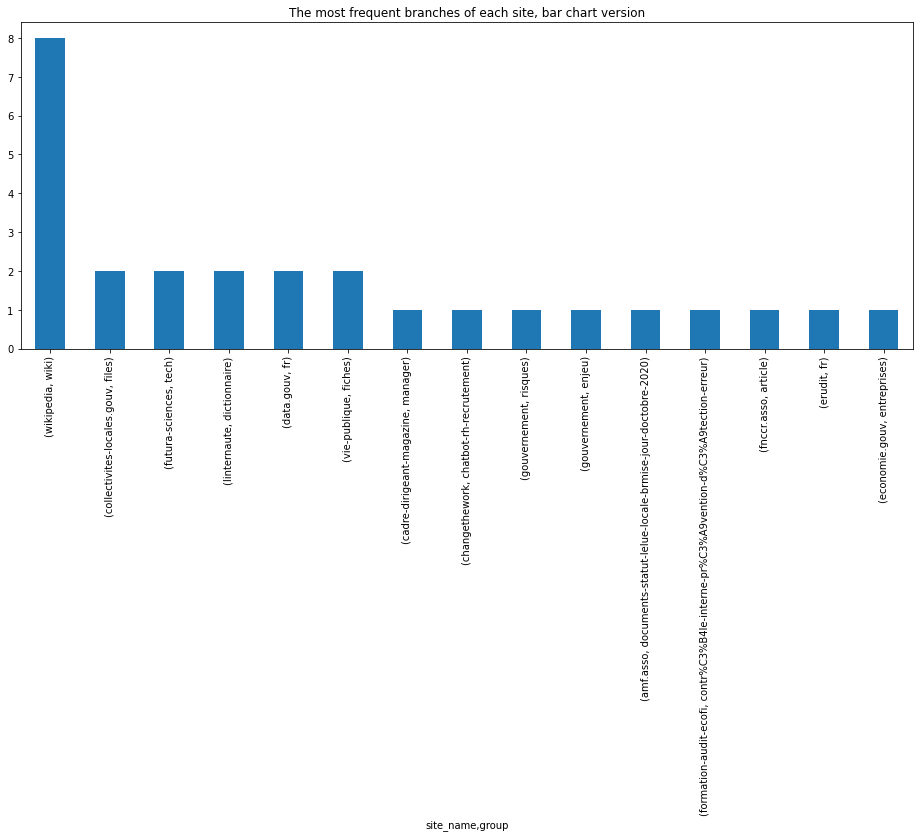

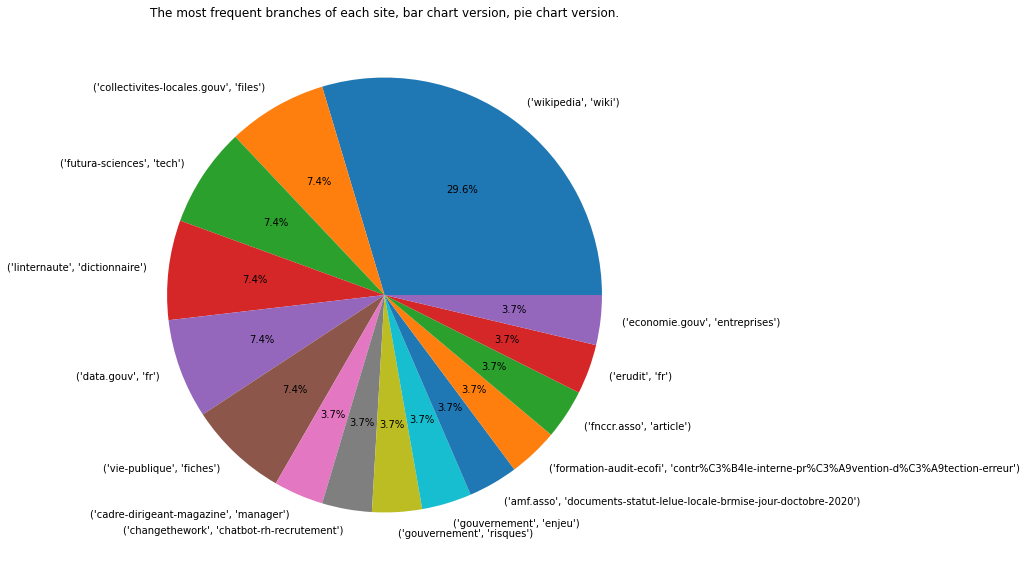

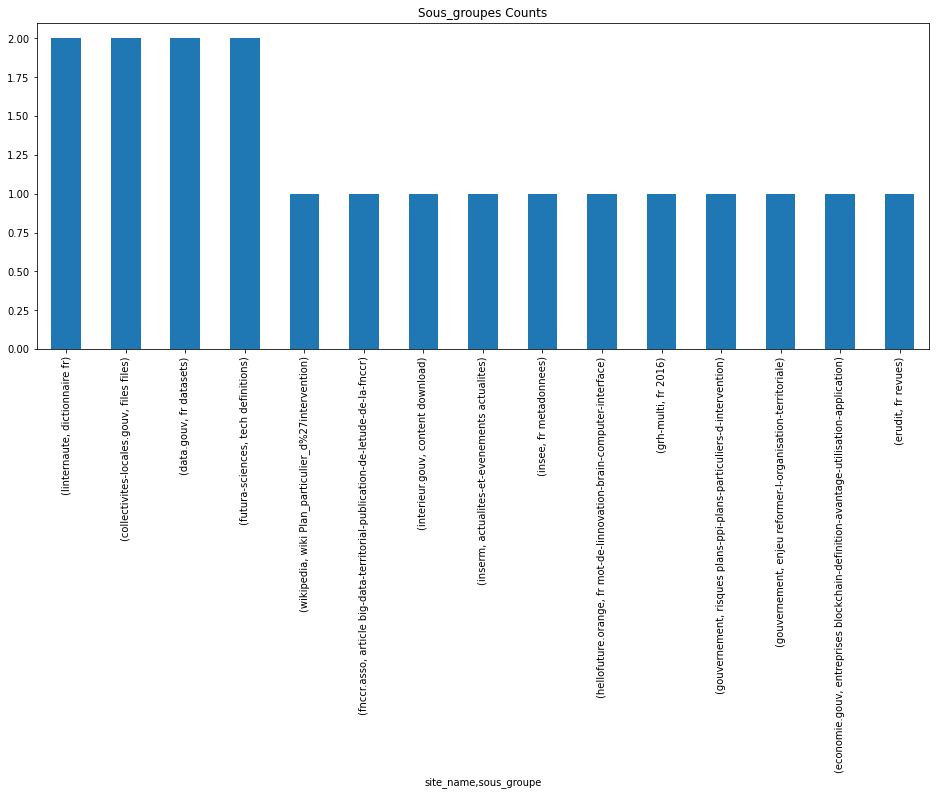

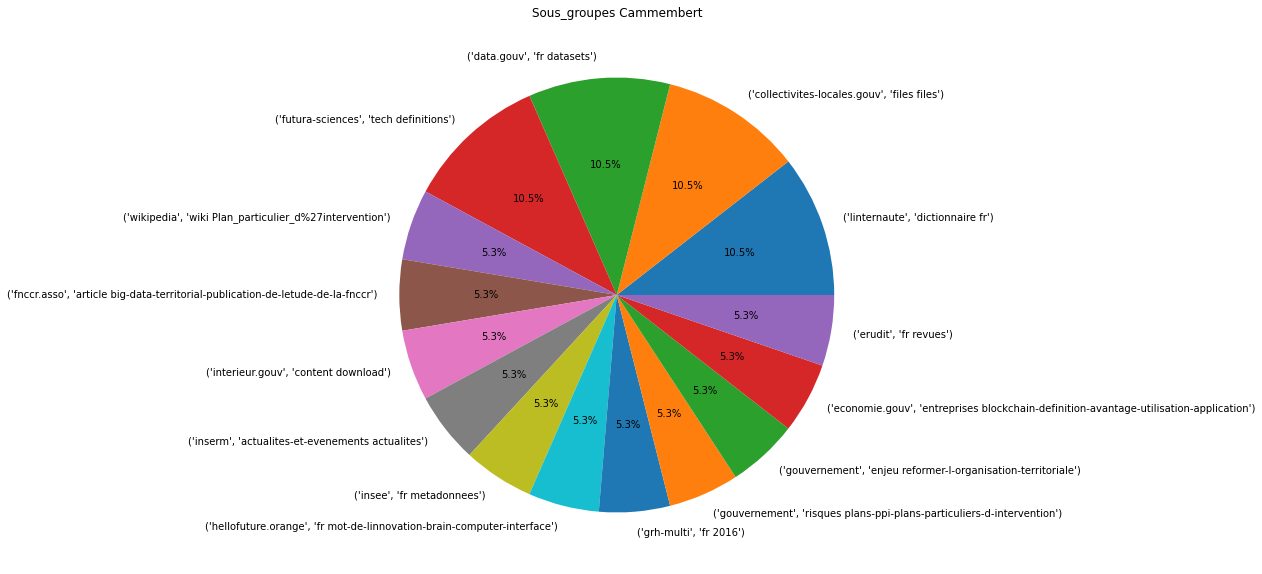

In [31]:
# function that makes breakdowns according to several indicators

def analyseGroupe(data,number=20) :
  data2 = data.copy()
  data['site_name']  =[site_name(i) for i in data['art_url']]
  data['site_url'] = [lienRacine(i) for i in data['art_url']]
  data['Chemins split'] = [splitPath(i) for i in data['art_url']]
  data['group'] = np.zeros(data.shape[0])
  data['sous_groupe'] = np.zeros(data.shape[0])

  for words in range(data['Chemins split'].shape[0]):
    if len(data['Chemins split'].iloc[words])>1 :
      data['group'].iloc[words] = data['Chemins split'].iloc[words][0]
      data['sous_groupe'].iloc[words] = data['Chemins split'].iloc[words][0] +' '+data['Chemins split'].iloc[words][1]
    if len(data['Chemins split'].iloc[words])==1 :
      data['group'].iloc[words] = data['Chemins split'].iloc[words][0]
      data['sous_groupe'].iloc[words] = np.nan

    if len(data['Chemins split'].iloc[words])==0 :
      data['group'].iloc[words] = np.nan
      data['sous_groupe'].iloc[words] = np.nan

  plt.title('The most frequent branches of each site, bar chart version')
  data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()


  plt.title('The most frequent branches of each site, bar chart version, pie chart version.')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number],  autopct='%1.1f%%', labels = data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number].index )
  plt.show()



  plt.title('Sous_groupes Counts')
  data.groupby(['site_name','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()
  plt.title('Sous_groupes Cammembert')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['site_name','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number], autopct='%1.1f%%', labels = data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number].index)
  plt.show()
 
  #print(data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False))
  
  #data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().plot(kind='bar',figsize=(16,6))
  #plt.show()
  #data.groupby(['nom_site','groupe'])['groupe'].count().plot(kind='bar',figsize=(16,6))
  #plt.show()
  
  return data,data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number],data.groupby(['site_name','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number]

analyseGroupe(site,15)
a=1

## **5 / Some metrics to know if crawler sites are relevant ...**

In [36]:
# 1 - Measuring Relevance by Taking Popularity 

def relevance_popularity(dataSite,nb_links=0):
  dataSite = dataSite.sort_values('art_url', axis=0, ascending=False)
  nb_links = nb_links + dataSite['art_url']
  return dataSite, nb_links

In [37]:
relevance_popularity(dataSite)

(                            art_url
 nom_site                           
 wikipedia                         8
 collectivites-locales.gouv        5
 linternaute                       3
 vie-publique                      2
 lagazettedescommunes              2
 changethework                     2
 gouvernement                      2
 futura-sciences                   2
 data.gouv                         2
 economie.gouv                     2
 omicron-formation                 1
 laas                              1
 lebigdata                         1
 lemondeinformatique               1
 modernisation.gouv                1
 myrhline                          1
 parlonsrh                         1
 oracle                            1
 interieur.gouv                    1
 prefectures-regions.gouv          1
 riskinsight-wavestone             1
 sabbar                            1
 sap                               1
 territorial                       1
 theinnovation                     1
 